<a href="https://colab.research.google.com/github/prashant-027/YBI_Handson_Project/blob/main/Bike_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Import Data**

In [4]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bike%20Prices.csv')

In [5]:
df.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0


In [6]:
df.dtypes

Brand                 object
Model                 object
Selling_Price          int64
Year                   int64
Seller_Type           object
Owner                 object
KM_Driven              int64
Ex_Showroom_Price    float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1061 non-null   object 
 1   Model              1061 non-null   object 
 2   Selling_Price      1061 non-null   int64  
 3   Year               1061 non-null   int64  
 4   Seller_Type        1061 non-null   object 
 5   Owner              1061 non-null   object 
 6   KM_Driven          1061 non-null   int64  
 7   Ex_Showroom_Price  626 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 66.4+ KB


# **Drop Missing Values.**

In [8]:
df = df.dropna()

# **Get Summary Statistics**

In [9]:
df.describe()

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,626.000000,626.000000,626.000000,6.260000e+02
mean,59445.164537,2014.800319,32671.576677,8.795871e+04
std,59904.350888,3.018885,45479.661039,7.749659e+04
min,6000.000000,2001.000000,380.000000,3.049000e+04
25%,30000.000000,2013.000000,13031.250000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,65000.000000,2017.000000,40000.000000,8.703150e+04
max,760000.000000,2020.000000,585659.000000,1.278000e+06


# **Get Categories and Count of Categorical Variables**

In [10]:
df[['Brand']].value_counts()

Brand   
Honda       170
Bajaj       143
Hero        108
Yamaha       94
Royal        40
TVS          23
Suzuki       18
KTM           6
Mahindra      6
Kawasaki      4
UM            3
Activa        3
Harley        2
Vespa         2
BMW           1
Hyosung       1
Benelli       1
Yo            1
dtype: int64

In [11]:
df[['Model']].value_counts()

Model                                     
Honda Activa [2000-2015]                      23
Honda CB Hornet 160R                          22
Bajaj Pulsar 180                              20
Yamaha FZ S V 2.0                             16
Bajaj Discover 125                            16
                                              ..
Royal Enfield Thunderbird 500                  1
Royal Enfield Continental GT [2013 - 2018]     1
Royal Enfield Classic Stealth Black            1
Royal Enfield Classic Squadron Blue            1
Yo Style                                       1
Length: 183, dtype: int64

In [13]:
df[['Seller_Type']].value_counts()

Seller_Type
Individual     623
Dealer           3
dtype: int64

In [14]:
df[['Owner']].value_counts()

Owner    
1st owner    556
2nd owner     66
3rd owner      3
4th owner      1
dtype: int64

# **Get Column Names**

In [15]:
df.columns

Index(['Brand', 'Model', 'Selling_Price', 'Year', 'Seller_Type', 'Owner',
       'KM_Driven', 'Ex_Showroom_Price'],
      dtype='object')

# **Get Shape of DataFrame**

In [16]:
df.shape

(626, 8)

# **Get Encoding of Categorical Features.**

In [17]:
df.replace({'Seller_Type':{'Individual':0,'Dealer':1}},inplace = True)

In [51]:
df.replace({'Owner':{'1st owner': 0,'2nd owner': 1,'3rd owner': 2,'4th owner': 3}},inplace = True)

# **Define Y(dependent or label or target variable) and X(independent or features or attribute Variables)**

In [36]:
Y = df['Selling_Price']

In [37]:
Y.shape

(626,)

In [38]:
Y

0       30000
1       18000
2       20000
3       25000
4       24999
        ...  
621    330000
622    300000
623    425000
624    760000
625    750000
Name: Selling_Price, Length: 626, dtype: int64

In [53]:
X = df[['Year', 'Seller_Type','Owner','KM_Driven', 'Ex_Showroom_Price']]

In [54]:
X.shape

(626, 5)

In [55]:
X

,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,2017,0,0,8000,30490.0
1,2017,0,0,35000,32000.0
2,2011,0,0,10000,37675.0
3,2010,0,0,43000,42859.0
4,2012,0,1,35000,42859.0
...,...,...,...,...,...
621,2014,0,3,6500,534000.0
622,2011,0,0,12000,589000.0
623,2017,0,1,13600,599000.0
624,2019,0,0,2800,752020.0


# **Get Train Test Split**

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=2529)

In [59]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((438, 5), (188, 5), (438,), (188,))

# **Get Model Train**

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
lr = LinearRegression()

In [62]:
lr.fit(X_train, Y_train)

LinearRegression()

# **Get Model Prediction**

In [64]:
Y_pred = lr.predict(X_test)

In [65]:
Y_pred.shape

(188,)

In [66]:
Y_pred

array([ 27210.52271465,  56340.08335163,  63471.94671996,  53627.63844785,
        55612.75744268,  53888.92259719,  33751.35275102,  60311.4950183 ,
       113713.05684467,  76639.49332954,  27826.7399381 ,  49919.83255841,
        65886.64311457,  26755.12664064,  48277.75426038, 127646.56079335,
        70047.10661635,  39350.67963653,  36081.03597878,  45360.79436339,
        48079.89470577,  44803.02464799,  55161.44026111,  71041.51821318,
        91689.22699159,  49301.53594645,  55988.19326252, 108171.54600296,
        32771.06897901,  25468.20072996,  17128.61806164, 179271.41130746,
        45698.99857622,  31371.09285079,  67886.52106737,  41492.49575815,
        56855.22238602,  47820.47003468,  74682.14053958,  24984.21822736,
        55374.00513699,  41412.36775222,  67991.60287764,  26553.59421844,
        89788.69870689,  45764.83633686, 133888.03770389, 106988.113825  ,
        71176.40667714,  25332.25485946,  79512.43778826,  63914.38088173,
        28632.12110986,  

# **Get Model Evaluation**

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [68]:
mean_squared_error(Y_test,Y_pred)

554715615.5043668

In [69]:
mean_absolute_error(Y_test,Y_pred)

12225.7370104107

In [70]:
r2_score(Y_test,Y_pred)

0.8810414402984937

# **Get Visualization of Actual VS Predicted Results.**

Text(0.5, 1.0, 'Actual Price vs Predicted Price')

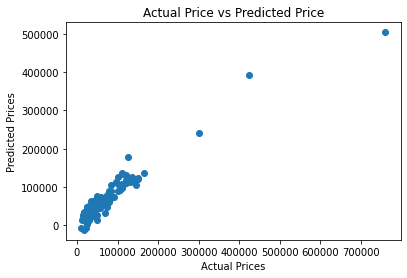

In [71]:
plt.scatter(Y_test,Y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")

# **Get Future Prediction**

Let's select a random sample from existing dataset as new value.

1) Extract a random row using sample function
2) Separte X and Y
3)Predict

In [72]:
df_new = df.sample(1)

In [73]:
df_new

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
31,Honda,Honda Navi,28000,2016,0,1,10000,47255.0


In [74]:
df_new.shape

(1, 8)

In [75]:
X_new = df_new.drop(['Brand','Model','Selling_Price'],axis=1)

In [76]:
Y_pred_new = lr.predict(X_new)

In [77]:
Y_pred_new

array([34603.36376989])